In [1]:
import os
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

home = '/home/kojo/Code/Alz_trVAE'
os.chdir(home)

In [4]:
# source = "WT"
# target = "HET"
# combination = 'U'
# normalized = False
# cellType = "all"
# condition_key = "Group"
# data_name = "alzPro-time"
source = "3m"
target = "9m"
combination = 'U'
normalized = False
cellType = "all"
condition_key = "Timepoint"
data_name = "alzPro-time"

In [5]:
trvae_reconstructed = sc.read(f"./data/reconstructed/trVAE_{data_name}/{cellType}_{source}_to_{target}_{'norm' if normalized else 'count'}_{combination}.h5ad")
trvae_reconstructed.obs

,Qi ID,sex,Group,Timepoint,Validation,batch
0-0,3131,M,all,3m_to_9m,Test,0
1-0,3132,M,all,3m_to_9m,Train,0
2-0,3140,M,all,3m_to_9m,Train,0
3-0,3141,M,all,3m_to_9m,Train,0
4-0,3153,F,all,3m_to_9m,Test,0
5-0,3154,F,all,3m_to_9m,Train,0
6-0,3156,F,all,3m_to_9m,Train,0
7-0,3157,F,all,3m_to_9m,Train,0
8-0,3346,F,all,3m_to_9m,Test,0
9-0,3347,F,all,3m_to_9m,Train,0


In [6]:
trvae_reconstructed

AnnData object with n_obs × n_vars = 32 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation', 'batch'

In [7]:
dist1 = trvae_reconstructed[trvae_reconstructed.obs[condition_key] == f"{source}_to_{target}"]
dist1.obs

,Qi ID,sex,Group,Timepoint,Validation,batch
0-0,3131,M,all,3m_to_9m,Test,0
1-0,3132,M,all,3m_to_9m,Train,0
2-0,3140,M,all,3m_to_9m,Train,0
3-0,3141,M,all,3m_to_9m,Train,0
4-0,3153,F,all,3m_to_9m,Test,0
5-0,3154,F,all,3m_to_9m,Train,0
6-0,3156,F,all,3m_to_9m,Train,0
7-0,3157,F,all,3m_to_9m,Train,0
8-0,3346,F,all,3m_to_9m,Test,0
9-0,3347,F,all,3m_to_9m,Train,0


In [8]:
dist1

View of AnnData object with n_obs × n_vars = 16 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation', 'batch'

In [9]:
dist2 = trvae_reconstructed[trvae_reconstructed.obs[condition_key] == target]
dist2.obs

,Qi ID,sex,Group,Timepoint,Validation,batch
32-1,2143,M,HET,9m,Test,1
33-1,2145,M,HET,9m,Train,1
34-1,2146,M,HET,9m,Train,1
35-1,2147,M,WT,9m,Test,1
36-1,2148,M,WT,9m,Train,1
37-1,2150,M,WT,9m,Train,1
38-1,2156,F,HET,9m,Test,1
39-1,2227,F,WT,9m,Test,1
40-1,2228,F,WT,9m,Train,1
41-1,2229,F,HET,9m,Train,1


In [10]:
dist2

View of AnnData object with n_obs × n_vars = 16 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation', 'batch'

In [11]:
lows = {i: dist1.var.index[i] for i in range(len(dist1.X[0])) if sum(dist1.X[:, i]) == 0}
lows

{1: 'A2A5R2|BIG2',
 3: 'A2A7S8|K1522',
 13: 'A2ALU4|SHRM2',
 17: 'A2APX8|SCN1A',
 22: 'A2ASZ8|SCMC2',
 23: 'A2AVR2|MROH7',
 31: 'B1AVY7|KI16B',
 37: 'B2RXS4|PLXB2',
 38: 'B2RY50|ARMC4',
 43: 'B9EKR1|PRPTZ',
 44: 'C0HK79|ARXS1',
 48: 'D3YZP9|CCDC6',
 54: 'E9Q414|APOB',
 55: 'E9Q4N7|ARI1B',
 57: 'E9Q4Z2|ACACB',
 61: 'E9Q7X7|NRX2A',
 62: 'E9Q8I9|FRY',
 64: 'F6ZDS4|TPR',
 66: 'G3UYX5|RGS22',
 69: 'G5E872|RNPL1',
 71: 'G5E8P0|GCP6',
 89: 'O08795|GLU2B',
 97: 'O08989|RASM',
 98: 'O08992|SDCB1',
 100: 'O09044|SNP23',
 107: 'O09172|GSH0',
 108: 'O35083|PLCA',
 111: 'O35114|SCRB2',
 119: 'O35239|PTN9',
 128: 'O35350|CAN1',
 139: 'O35621|PMM1',
 141: 'O35639|ANXA3',
 145: 'O35681|SYT3',
 147: 'O35683|NDUA1',
 153: 'O35874|SATT',
 154: 'O35887|CALU',
 155: 'O35900|LSM2',
 165: 'O54865|GCYB1',
 166: 'O54887|TSKS',
 182: 'O55033|NCK2',
 195: 'O55186|CD59A',
 196: 'O55229|CHKB',
 203: 'O70228|ATP9A',
 222: 'O88384|VTI1B',
 227: 'O88448|KLC2',
 234: 'O88533|DDC',
 241: 'O88653|LTOR3',
 243: 'O88696|C

In [12]:
lows_list = {lows[key]:(sum(dist2.X[:, key])/8) for key in lows.keys()}
lows_list = sorted(lows_list.items(), reverse=True, key=lambda item: item[1])
lows_list

[('Q91XV3|BASP1', 45675000.0),
 ('P18872|GNAO', 24222500.0),
 ('P62814|VATB2', 14560000.0),
 ('Q6ZPE2|MTMR5', 11851250.0),
 ('P84086|CPLX2', 9768750.0),
 ('P62761|VISL1', 7332500.0),
 ('Q8BGZ1|HPCL4', 4788750.0),
 ('Q6ZWR6|SYNE1', 4601250.0),
 ('Q91YT0|NDUV1', 4491000.0),
 ('P68369|TBA1A', 4322625.0),
 ('B9EKR1|PRPTZ', 3971250.0),
 ('O88448|KLC2', 3881250.0),
 ('P24452|CAPG', 3059500.0),
 ('Q80VP1|EPN1', 2941875.0),
 ('Q9D0M3|CY1', 2888625.0),
 ('Q3UHJ0|AAK1', 2808250.0),
 ('Q791V5|MTCH2', 2589750.0),
 ('P35564|CALX', 2521500.0),
 ('Q8BG05|ROA3', 2475625.0),
 ('Q11011|PSA', 2268250.0),
 ('Q9WTP7|KAD3', 2256500.0),
 ('O35874|SATT', 2157375.0),
 ('Q9QUP5|HPLN1', 1926500.0),
 ('Q9Z2H5|E41L1', 1922125.0),
 ('P27661|H2AX', 1562375.0),
 ('P33175|KIF5A', 1529375.0),
 ('Q8VBX6|MPDZ', 1524250.0),
 ('Q80TZ3|AUXI', 1504750.0),
 ('Q9D6J5|NDUB8', 1467875.0),
 ('P48722|HS74L', 1459250.0),
 ('A2AVR2|MROH7', 1424250.0),
 ('P63158|HMGB1', 1308500.0),
 ('Q0VF58|COJA1', 1203500.0),
 ('Q8BYM5|NLGN3', 1104

In [13]:
highs = {i: dist2.var.index[i] for i in range(len(dist2.X[0])) if sum(dist2.X[:, i]) == 0}

if len(highs) < 100:
    sum_dict = {}
    for i in range(len(dist2.X[0])):
        sum_dict[(i, dist2.var.index[i])] = sum(dist2.X[:, i])
    highs = {val[0][0]: val[0][1] for val in sorted(sum_dict.items(), key = lambda x: x[1])[:100]}
highs

{4: 'A2A8L1|CHD5',
 6: 'A2ADY9|DDI2',
 11: 'A2AL36|CNTRL',
 16: 'A2APV2|FMNL2',
 17: 'A2APX8|SCN1A',
 21: 'A2ASS6|TITIN',
 28: 'A7M7C7|SKOR2',
 29: 'A8C756|THADA',
 35: 'B2RUJ5|APBA1',
 36: 'B2RW38|CFA58',
 39: 'B7ZNG0|KIF7',
 42: 'B9EJV3|GRB1L',
 47: 'D3YZI9|PGBD5',
 60: 'E9Q7G0|NUMA1',
 67: 'G3X9K3|BIG1',
 71: 'G5E8P0|GCP6',
 73: 'O08530|S1PR1',
 87: 'O08759|UBE3A',
 91: 'O08848|RO60',
 92: 'O08912|GALT1',
 107: 'O09172|GSH0',
 109: 'O35089|CNIH2',
 116: 'O35206|COFA1',
 121: 'O35280|CHK1',
 124: 'O35326|SRSF5',
 133: 'O35459|ECH1',
 145: 'O35681|SYT3',
 147: 'O35683|NDUA1',
 168: 'O54916|REPS1',
 177: 'O55017|CAC1B',
 184: 'O55057|PDE6D',
 192: 'O55135|IF6',
 200: 'O70165|FCN1',
 204: 'O70250|PGAM2',
 210: 'O70433|FHL2',
 219: 'O88196|TTC3',
 223: 'O88398|AVIL',
 231: 'O88507|CNTFR',
 245: 'O88704|HCN1',
 254: 'O88952|LIN7C',
 262: 'O89079|COPE',
 263: 'O89084|PDE4A',
 267: 'P00397|COX1',
 275: 'P01864|GCAB',
 276: 'P01867|IGG2B',
 313: 'P07759|SPA3K',
 333: 'P0C027|NUD10',
 335: 'P

In [14]:
highs_list = {highs[key]:(sum(dist1.X[:, key])/8) for key in highs.keys()}
highs_list = sorted(highs_list.items(), reverse=True, key=lambda item: item[1])
highs_list

[('Q8BH34|SEM3D', 22260012.625),
 ('Q8C3X4|GUF1', 20854693.5),
 ('P68433|H31', 14956989.5),
 ('P10854|H2B1M', 10933120.5),
 ('P15864|H12', 4396176.71875),
 ('Q9CQX8|RT36', 3748665.46875),
 ('Q62311|TAF6', 3402245.5),
 ('P70169|DOC2B', 3204972.9375),
 ('Q9CQZ6|NDUB3', 2610529.125),
 ('Q9Z0R0|HASP', 2384452.546875),
 ('Q99LI2|CLCC1', 1962063.8828125),
 ('Q9CQR4|ACO13', 1935882.25),
 ('Q9QZR9|CO4A4', 1793945.625),
 ('Q14BB9|MA6D1', 1748286.3203125),
 ('Q56A07|SCN2B', 1708581.2890625),
 ('Q99JR8|SMRD2', 1645401.359375),
 ('Q9WV02|RBMX', 1590573.7578125),
 ('Q8BHE3|ATCAY', 1563776.7109375),
 ('P62754|RS6', 1437434.7890625),
 ('Q6PB70|ANO8', 1353008.3203125),
 ('Q9DCB4|ARP21', 1346624.5703125),
 ('P01867|IGG2B', 1295839.5703125),
 ('P10751|ZFP11', 1254401.3046875),
 ('Q9DCU2|PLLP', 1250906.375),
 ('Q80XU3|NUCKS', 1121435.00390625),
 ('P56379|68MP', 1098300.96875),
 ('P0DN34|NDUB1', 1075472.8125),
 ('A2ASS6|TITIN', 1005356.38671875),
 ('P41242|MATK', 910094.19921875),
 ('Q9CR98|F136A', 888262

In [15]:
print(sum(dist1.X[:, 0]))
print(dist1.var.index[0])

3646464.71875
A2A432|CUL4B


In [16]:
protein_meansR = {}
for i in range(len(dist2.X[0])):
    protein_meansR[dist2.var.index[i]] = sum(dist2.X[:,i])/len(dist2.X[:,i])

print(min(protein_meansR.values()))

0.0


In [17]:
protein_meansP = {}
for i in range(len(dist1.X[0])):
    protein_meansP[dist1.var.index[i]] = sum(dist1.X[:,i])/len(dist1.X[:,i])

print(min(protein_meansP.values()))

0.0


In [18]:
len(list(protein_meansP.keys()))

2969

In [19]:
len(list(protein_meansR.keys()))

2969

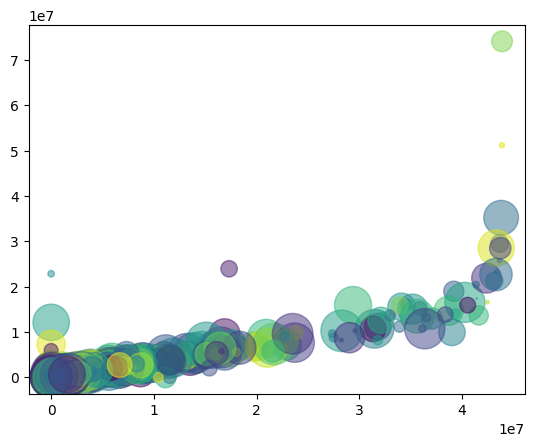

In [20]:
np.random.seed(2432532)

N = len(dist1.X[0])
#x = list(protein_meansP.keys())
x = [sum(dist1.X[:,i])/len(dist1.X[:,i]) for i in range(len(dist1.X[0]))]
#y = list(protein_meansR.keys())
y = [sum(dist2.X[:,i])/len(dist2.X[:,i]) for i in range(len(dist1.X[0]))]
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [21]:
protein_diffs = {}
for i in range(len(protein_meansP)):
    protein_diffs[dist1.var.index[i]] = abs(sum(dist1.X[:,i])/len(dist1.X[:,i]) - sum(dist2.X[:,i])/len(dist2.X[:,i]))

print(max(protein_diffs.values()))

30204683.75


In [35]:
protein_tests = sorted(protein_diffs.items(), reverse=True, key = lambda x: x[1])
# Potentially significant proteins
with open(f"./results/{data_name}/{cellType}_{source}_to_{target}_{'norm' if normalized else 'count'}_{combination}_significant_protein_diffs.txt", "w") as f:
    for protein in protein_tests:
        f.writelines(f"{protein[0]}: {protein[1]}\n")
protein_tests

[('P60202|MYPR', 30204683.75),
 ('P35802|GPM6A', 29089380.0),
 ('P16330|CN37', 27966879.0),
 ('Q6PIC6|AT1A3', 25895093.5),
 ('Q99KI0|ACON', 25655127.875),
 ('Q60932|VDAC1', 25353047.375),
 ('P43006|EAA2', 25312329.75),
 ('P17182|ENOA', 24632261.5),
 ('Q03265|ATPA', 24525265.0),
 ('O88935|SYN1', 24072991.875),
 ('P08249|MDHM', 24050451.0),
 ('P11798|KCC2A', 24002139.5),
 ('P14152|MDHC', 23745397.25),
 ('Q62277|SYPH', 23622223.375),
 ('P63017|HSP7C', 23393076.375),
 ('Q91XV3|BASP1', 22837500.0),
 ('Q9R0P9|UCHL1', 22732672.0),
 ('P01831|THY1', 22505088.875),
 ('P70296|PEBP1', 22160827.875),
 ('P56480|ATPB', 21861546.5),
 ('Q64332|SYN2', 20899018.0),
 ('P18760|COF1', 20776481.125),
 ('P17742|PPIA', 20681140.875),
 ('Q04447|KCRB', 20628151.5),
 ('P39053|DYN1', 20625504.375),
 ('P15105|GLNA', 20611238.75),
 ('P52480|KPYM', 20513362.25),
 ('Q68FD5|CLH1', 20299293.625),
 ('P0DP27|CALM2', 20217906.0),
 ('P62806|H4', 20154281.0),
 ('P05064|ALDOA', 20077050.5),
 ('P48962|ADT1', 20058402.375),
 ('

In [23]:
protein_ttest = {}
count = 0
for i in range(len(protein_meansP)):
    ttest = stats.ttest_ind(dist1.X[:,i], dist2.X[:,i])
    protein_ttest[dist1.var.index[i]] = ttest.statistic

print(min(protein_ttest.values()))

-32.52732395564279


In [24]:
protein_tests = sorted(protein_ttest.items(), key = lambda x: x[1])
# Potentially significant proteins
with open(f"./results/{data_name}/{cellType}_{source}_to_{target}_{'norm' if normalized else 'count'}_{combination}_significant_protein_ttests.txt", "w") as f:
    for protein in protein_tests:
        f.writelines(f"{protein[0]}: {protein[1]}\n")
protein_tests

[('O88448|KLC2', -22.317501825480033),
 ('A2A7S8|K1522', -19.25202437145402),
 ('B9EKR1|PRPTZ', -16.594494739100547),
 ('P60867|RS20', -16.389443602638103),
 ('A2AVR2|MROH7', -16.229890575409975),
 ('P60670|NPL4', -14.376954371854852),
 ('B2RXS4|PLXB2', -12.238299095959968),
 ('B1AVY7|KI16B', -11.294557926331967),
 ('P60824|CIRBP', -11.18403717695645),
 ('A2ALU4|SHRM2', -9.93199887141892),
 ('A2A5R2|BIG2', -8.00399762865644),
 ('P61079|UB2D3', -7.691199553588124),
 ('A2ASZ8|SCMC2', -7.058087143535341),
 ('P60764|RAC3', -6.356323678635578),
 ('C0HK79|ARXS1', -6.338366820562246),
 ('A2AN08|UBR4', -5.835067498619964),
 ('B2RY50|ARMC4', -5.062673996696636),
 ('P60202|MYPR', -4.573985172059069),
 ('A2AP18|PLCH2', -3.19652382167409),
 ('P59759|MKL2', -0.606946993427765),
 ('A2ASQ1|AGRIN', 0.5165098327540616),
 ('B1AZP2|DLGP4', 0.6634553916055159),
 ('A2AWA9|RBGP1', 0.8199800271505642),
 ('A2AG50|MA7D2', 0.9749829366134587),
 ('P59108|CPNE2', 3.070579569737348),
 ('A2A8L5|PTPRF', 3.8898082867

In [25]:
means = pd.DataFrame(list(zip(x, y)), columns=['Predicted', 'Actual'])
means.head()

,Predicted,Actual
0,227904.044922,69700.00
1,0.000000,59681.25
2,425912.302734,142318.75
3,0.000000,26487.50
4,168420.111328,0.00


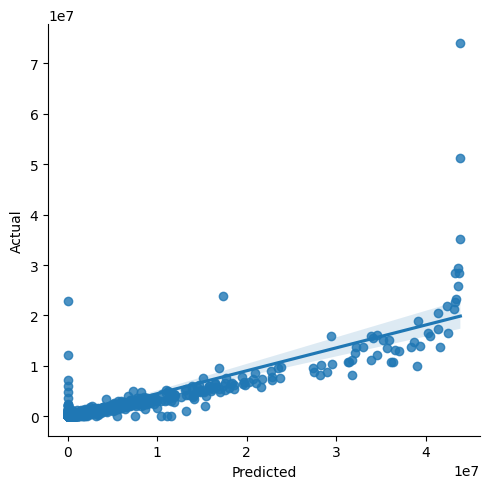

In [26]:
import seaborn as sb

sb.lmplot(x='Predicted', y='Actual', data=means)

In [27]:
stats.pearsonr(x, y)

(0.8545688097204839, 0.0)

In [28]:
stats.spearmanr(x, y)

SpearmanrResult(correlation=0.8068923878245172, pvalue=0.0)

In [30]:
import reptrvae

sc.set_figure_params(dpi=200)
path_to_save = "./results/alzPro-time/"
sc.settings.figdir = path_to_save

Using TensorFlow backend.


In [29]:
trvae_reconstructed.var_names.values

array(['A2A432|CUL4B', 'A2A5R2|BIG2', 'A2A699|F1712', ..., 'Q9Z2X1|HNRPF',
       'Q9Z2Y3|HOME1', 'Q9Z2Y8|PLPHP'], dtype=object)

reg_mean_top100: 0.7302878611444996
reg_mean_all: 0.7302878611444996


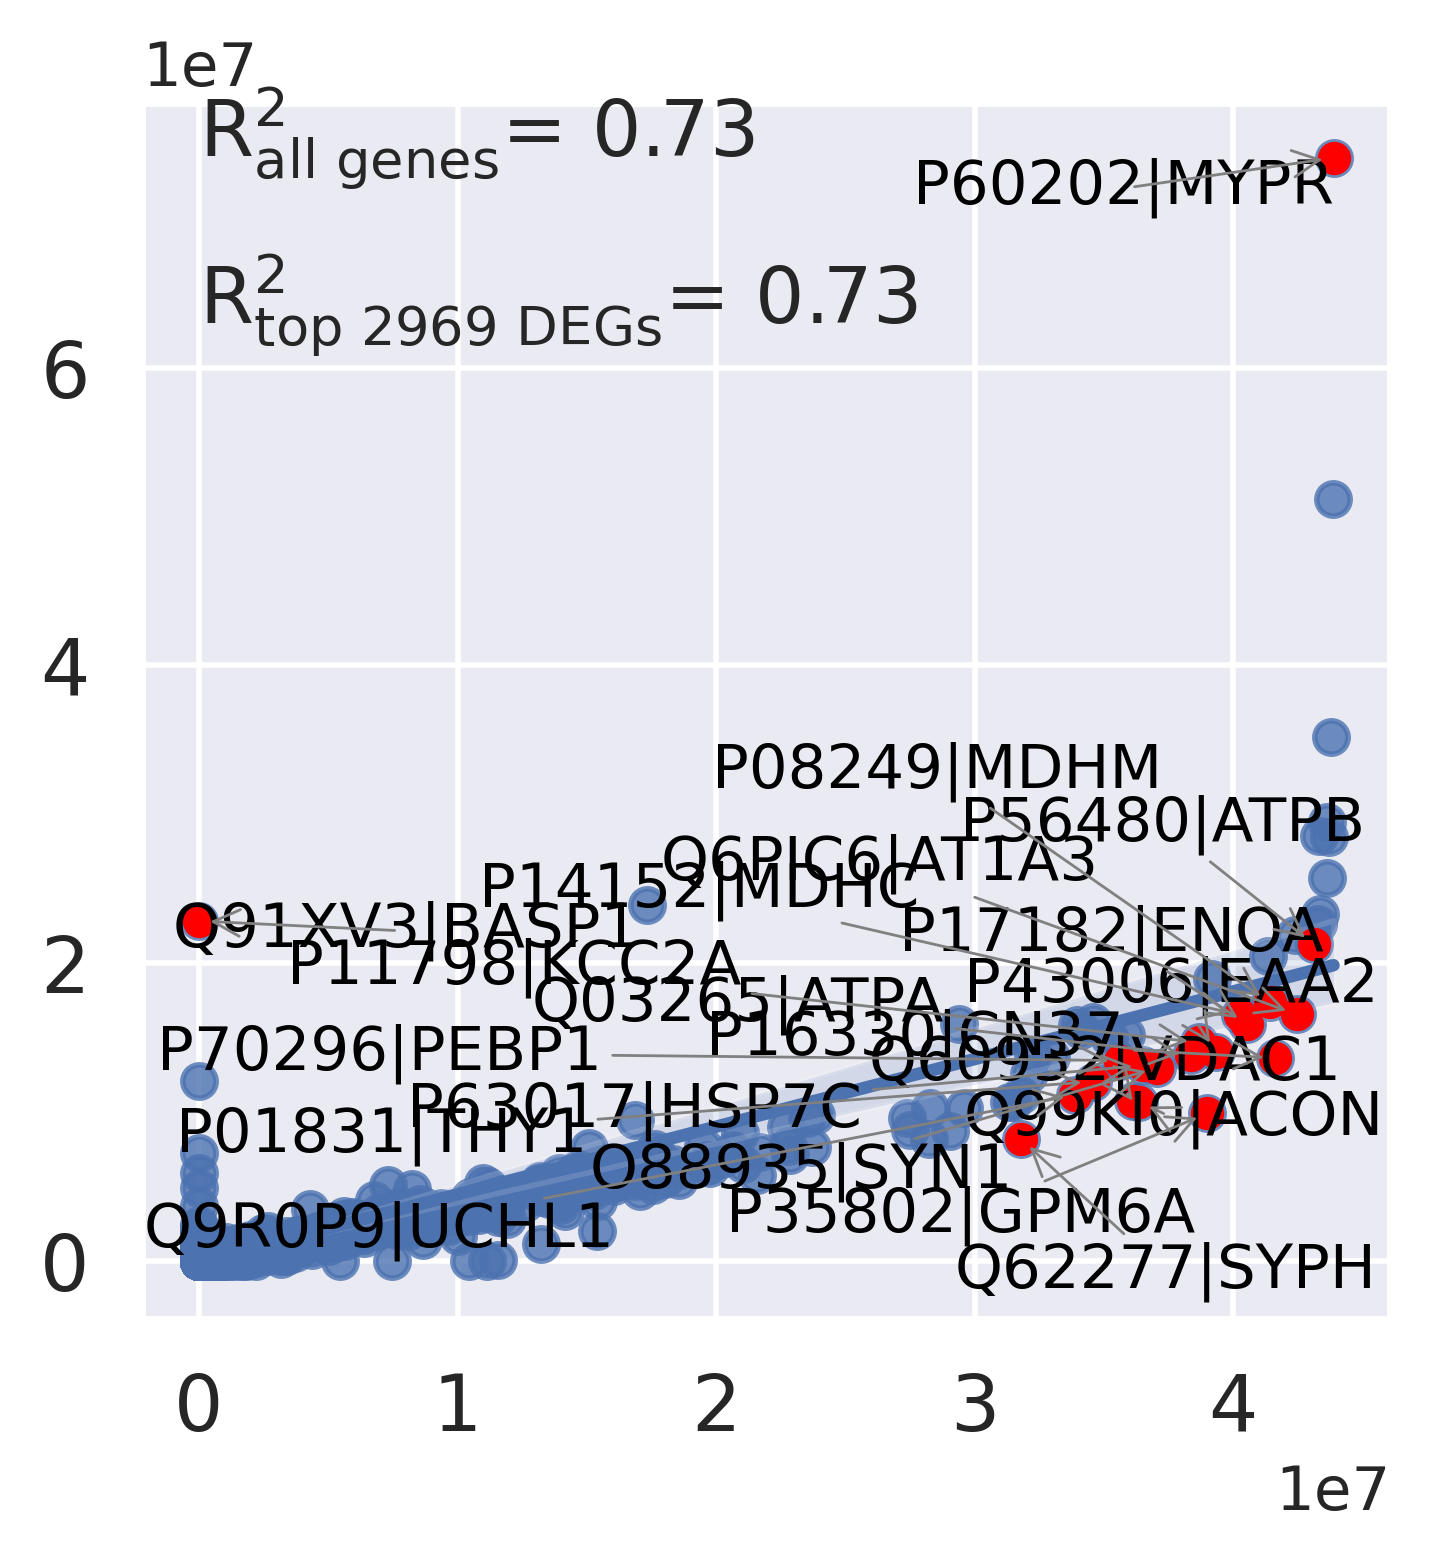

In [40]:
reptrvae.pl.reg_mean_plot(trvae_reconstructed,
                         top_100_genes=trvae_reconstructed.var_names.values,
                         gene_list=[val[0] for val in protein_tests][:20],
                         condition_key=condition_key,
                         axis_keys={'x': f"{source}_to_{target}", 'y': target},
                         labels={'x': "", 'y': ""},
                         path_to_save=os.path.join(path_to_save, f"linearRegression_{source}_{target}_to_{target}_{'normalized' if normalized else 'count'}_{combination}_reg_mean.pdf"),
                         legend=False,
                         show=True,
                         x_coeff=1.0,
                         y_coeff=0.0)